In [4]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set_style("whitegrid", {'axes.grid' : False})
import scipy.stats as st



In [3]:
#### Load 5UTR Fasta files into dataframe

UTR5_Dict={}
UTR5_Dict2={}
with open("5UTR.fasta", "rU") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        UTR5_Dict[record.id]= record.seq
        UTR5_Dict2[record.id]= len(record.seq)
s1 = pd.Series(data=UTR5_Dict)
s2 =pd.Series(data=UTR5_Dict2)
df_5UTR= pd.concat([s1, s2], axis=1)
df_5UTR=df_5UTR.rename(columns={0:"Sequence", 1:"Sequence Length"})

df_5UTR.index.name = 'Gene'
UTR5_meanlength= df_5UTR["Sequence Length"].mean() #Get mean length of 5UTR
UTR5_num=df_5UTR.count()[0]#Get number of squences for 5UTR


#### Load 3UTR Fasta files into dataframe
UTR3_Dict={}
UTR3_Dict2={}
with open("3UTR.fasta", "rU") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        UTR3_Dict[record.id]= record.seq
        UTR3_Dict2[record.id]= len(record.seq)
s1 = pd.Series(data=UTR3_Dict)
s2 =pd.Series(data=UTR3_Dict2)
df_3UTR= pd.concat([s1, s2], axis=1)
df_3UTR=df_3UTR.rename(columns={0:"Sequence", 1:"Sequence Length"})


df_3UTR.index.name = 'Gene'
UTR3_meanlength= df_3UTR["Sequence Length"].mean()#Get mean length of 3UTR
UTR3_num=df_3UTR.count()[0] #Get number of squences for 3UTR


<ipython-input-3-7f76480538a2>:5: DeprecationWarning: 'U' mode is deprecated
  with open("5UTR.fasta", "rU") as handle:


NameError: name 'SeqIO' is not defined

In [14]:
df_5UTR.head()


,Sequence,Sequence Length
Gene,,
danRer11_ensGene_ENSDART00000144711.2,"(T, C, C, T, G, G, T, T, A, G, G, T, G, A, A, ...",136
danRer11_ensGene_ENSDART00000177225.2,"(G, T, C, A, C, A, T, A, C, C, A, T, A, T, A, ...",275
danRer11_ensGene_ENSDART00000075632.6,"(T, C, C, G, C, C, T, A, C, C, T, C, T, C, G, ...",189
danRer11_ensGene_ENSDART00000187346.1,"(T, A, C, A, A, A, T, G, A, A, G, G, A, C, T, ...",42
danRer11_ensGene_ENSDART00000092114.8,"(C, T, C, T, T, T, G, T, C, A, T, G, A, C, A, ...",417


<AxesSubplot:>

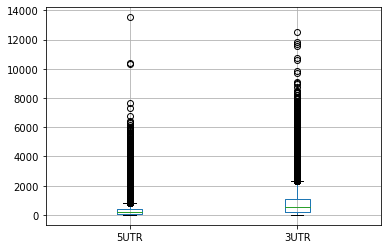

In [38]:
df_3UTR.head()

df_5UTR["Sequence Length"]


df_concat = pd.DataFrame({
    '5UTR': df_5UTR["Sequence Length"],
    '3UTR': df_3UTR["Sequence Length"]
})

df_concat.boxplot(column = ['5UTR', '3UTR'])

      UTR  Count
0  5' UTR  40074
1  3' UTR  37996


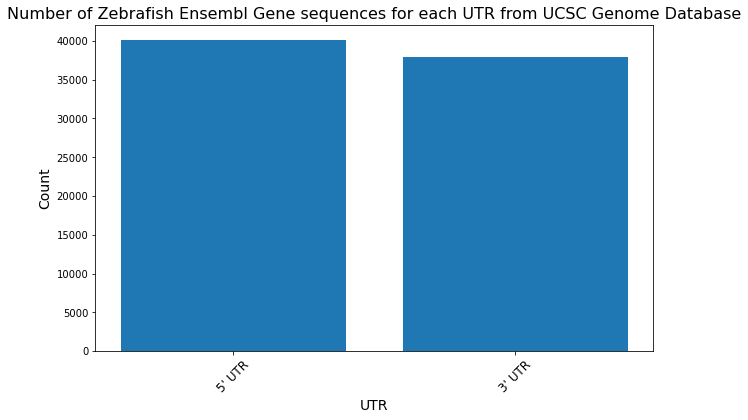

In [16]:
#Make Bar Graph of number of genes

df= pd.DataFrame(data={"UTR": ["5' UTR", "3' UTR"], "Count": [UTR5_num, UTR3_num]})
print(df)
fig = plt.figure(figsize=(10, 6))
plt.bar(range(len(df['UTR'])),df['Count'], align = 'center')
# Formatting graph
plt.xticks(range(len(df['UTR'])), df['UTR'],rotation = 45, fontsize = 12)
plt.xlabel('UTR', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of Zebrafish Ensembl Gene sequences for each UTR from UCSC Genome Database', fontsize=16)

plt.show()

In [20]:
df2

,UTR,Mean
0,5' UTR,303.838249
1,3' UTR,905.884988


      UTR        Mean
0  5' UTR  303.838249
1  3' UTR  905.884988


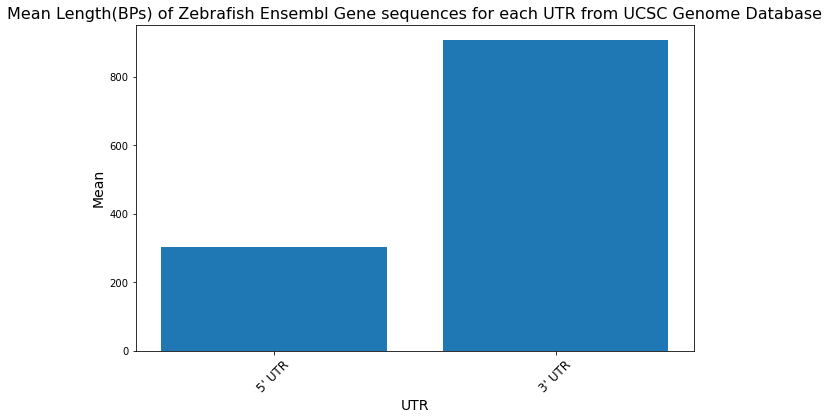

In [17]:
#Make Bar Graph of mean lengths

df2= pd.DataFrame(data={"UTR": ["5' UTR", "3' UTR"], "Mean": [UTR5_meanlength, UTR3_meanlength]})
print(df2)
fig = plt.figure(figsize=(10, 6))
plt.bar(range(len(df2['UTR'])),df2['Mean'], align = 'center')
# Formatting graph
plt.xticks(range(len(df2['UTR'])), df2['UTR'],rotation = 45, fontsize = 12)
plt.xlabel('UTR', fontsize=14)
plt.ylabel('Mean', fontsize=14)
plt.title('Mean Length(BPs) of Zebrafish Ensembl Gene sequences for each UTR from UCSC Genome Database', fontsize=16)

plt.show()

In [7]:
log_pro = pd.read_csv('All_times_Pro_logged_3UTR_3mer.txt', sep='\t', index_col=0)
log_pro = log_pro[log_pro.columns[2:len(log_pro.columns)]]

FileNotFoundError: [Errno 2] No such file or directory: 'All_times_Pro_logged_3UTR_3mer.txt'